## Plot bias amplification after fine-tuning

Code for generating Figure 4, 6, 7, 8 and 9

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches

matplotlib.rcParams['text.usetex'] = True
plt.rc('font', family='serif', serif=['Times'])

In [4]:
models = [
    '$\\mathrm{\\textsc{LXMERT_{180K}}}$', #0
    '$\\mathrm{\\textsc{LXMERT_{180K}^{N}}}$', #4
    '$\\mathrm{\\textsc{LXMERT_{3M}}}$', #1
    '$\\mathrm{\\textsc{LXMERT_{3M}^{N}}}$', #5
    '$\\mathrm{\\textsc{ALBEF_{4M}}}$', #2
    '$\\mathrm{\\textsc{ALBEF_{4M}^{N-COCO}}}$', #6
    '$\\mathrm{\\textsc{ALBEF_{4M}^{N-CC3M}}}$', #7
    '$\\mathrm{\\textsc{ALBEF_{14M}}}$', #2
    '$\\mathrm{\\textsc{ALBEF_{14M}^{N-COCO}}}$', #6
    '$\\mathrm{\\textsc{ALBEF_{14M}^{N-CC3M}}}$', #7
    '$\\mathrm{\\textsc{BLIP_{129M}}}$', #3
    '$\\mathrm{\\textsc{BLIP_{129M}}^{N}}$' #8
]

# VQAv2

In [25]:
lxmert=[-0.02929688,-0.06837607, 0.00467914]
lxmert_n=[-0.01994978,-0.05189255,0.00066845]
lxmert_3m=[-0.02050781,-0.06471306,-0.03743316]
lxmert_3m_n=[-0.02078683,-0.07448107,-0.02361854]
albef_4m=[-0.02078683,-0.06807082,0.00044563]
albef_4m_coco=[-0.02553013,-0.07478632,-0.00690731]
albef_4m_cc3m=[-0.02399554,-0.06593407,-0.00846702]
albef_14m=[-0.03473772,-0.07478632,0.00044563]
albef_14m_coco=[-0.02790179,-0.07112332,-0.00066845]
albef_14m_cc3m=[-0.03390067,-0.07600733,-0.00690731]
blip=[-0.01967076,-0.01617827,-0.03475936]
blip_coco=[-0.01632254,-0.01678877,-0.03253119]

# Visualize data
data_ = [lxmert, lxmert_n,
         lxmert_3m, lxmert_3m_n,
         albef_4m, albef_4m_coco, albef_4m_cc3m,
         albef_14m, albef_14m_coco, albef_14m_cc3m,
         blip, blip_coco]
index_ = ["lxmert", "lxmert_n",
          "lxmert_3m", "lxmert_3m_n",
          "albef4m", "albef4m_n", "concapalbef4m_n", 
          "albef14m", "albef14m_n", "concapalbef14m_n", 
          "blip", "blip_n"]
df = pd.DataFrame(data=data_, 
                  index=index_,
                  columns=["M","F","N"])
df["model"] = df.index
df

,M,F,N,model
lxmert,-0.029297,-0.068376,0.004679,lxmert
lxmert_n,-0.019950,-0.051893,0.000668,lxmert_n
concaplxmert,-0.020508,-0.064713,-0.037433,concaplxmert
concaplxmert_n,-0.020787,-0.074481,-0.023619,concaplxmert_n
albef4m,-0.020787,-0.068071,0.000446,albef4m
albef4m_n,-0.025530,-0.074786,-0.006907,albef4m_n
concapalbef4m_n,-0.023996,-0.065934,-0.008467,concapalbef4m_n
albef14m,-0.034738,-0.074786,0.000446,albef14m
albef14m_n,-0.027902,-0.071123,-0.000668,albef14m_n
concapalbef14m_n,-0.033901,-0.076007,-0.006907,concapalbef14m_n


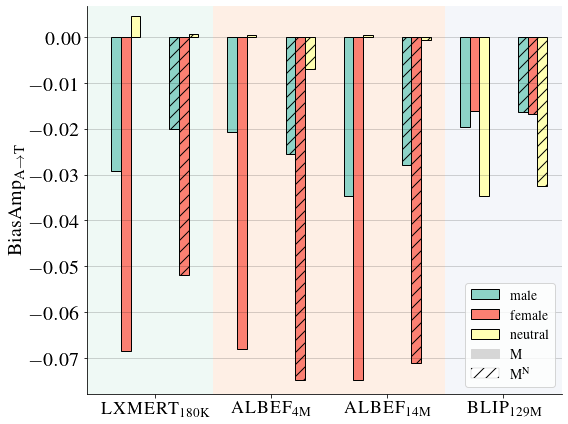

In [28]:
name="vqa_dba"

data_ = [
         lxmert, lxmert_n,
         albef_4m, albef_4m_coco,
         albef_14m, albef_14m_coco,
         blip, blip_coco]
index_ = ["lxmert", "lxmert_n",
          "albef4m", "albef4m_n", 
          "albef14m", "albef14m_n", 
          "blip", "blip_n"]
df = pd.DataFrame(data=data_, 
                  index=index_,
                  columns=["M","F","N"])
df["model"] = df.index

f, ax0 = plt.subplots(figsize=(8,6), tight_layout=True)

bar_width = 2./len(models)

cm = plt.get_cmap('Set3') 
colors = cm.colors
bcm = plt.get_cmap('Pastel2')
bcolors = bcm.colors
ax0.set_xlim(-0.5, 7.5+bar_width) 
ax0.axvspan(-0.5, 1.5+bar_width, facecolor=bcolors[0], alpha=0.2)
ax0.axvspan(1.5+bar_width, 5.5+bar_width, facecolor=bcolors[1], alpha=0.3)
ax0.axvspan(5.5+bar_width, 7.5+bar_width, facecolor=bcolors[2], alpha=0.2)

ax0.set_xticks([0.5+bar_width, 2.5+bar_width, 4.5+bar_width, 6.5+bar_width])
ax0.set_xticklabels(['$\\mathrm{\\textsc{LXMERT}_{180K}}$', 
                     '$\\mathrm{\\textsc{ALBEF}_{4M}}$', 
                     '$\\mathrm{\\textsc{ALBEF}_{14M}}$', 
                     '$\\mathrm{\\textsc{BLIP}_{129M}}$'], fontsize=18)

plot_dict = {
    'M': colors[0],
    'F': colors[3],
    'N': colors[1]}
row_names = list(plot_dict.keys())

X = np.array(range(len(df)))
xs = [x[i] for i in range(3) for x in df.values]

for i, name in list(enumerate([y for x in row_names for y in x])):
    ys = [x for x in df[name].values]    
    label=None
    ax0.bar(X + i*bar_width, ys, 
            width=bar_width, label=label, color=plot_dict[name], 
            hatch=[None, "//"]*int(len(df)/2), 
            edgecolor='black') 
        

ax0.set_ylabel('$\\mathrm{BiasAmp_{ A\\rightarrow{T}}}$', fontsize=20)
ax0.set_ylim(min(xs)-0.003, max(xs)+0.002)

ax0.tick_params(axis="y", labelsize=20)
ax0.grid(color='black', alpha=0.2, axis='y')

ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)

h = [Patch(facecolor=colors[0], edgecolor='k', label='male'),
     Patch(facecolor=colors[3], edgecolor='k', label='female'),
     Patch(facecolor=colors[1], edgecolor='k', label='neutral'),
     Patch(facecolor='#d6d6d6', edgecolor='#d6d6d6', label='$\\mathrm{M}$'),
     Patch(facecolor='white', edgecolor='black', hatch='//',linewidth=0.1, label='$\\mathrm{M^{N}}$'),
    ]
ax0.legend(handles=h, ncol=1, scatterpoints=1, fontsize=14, loc='lower right')

plt.savefig(f'figures/vqa_dba_hist_coco.pdf', bbox_inches='tight')

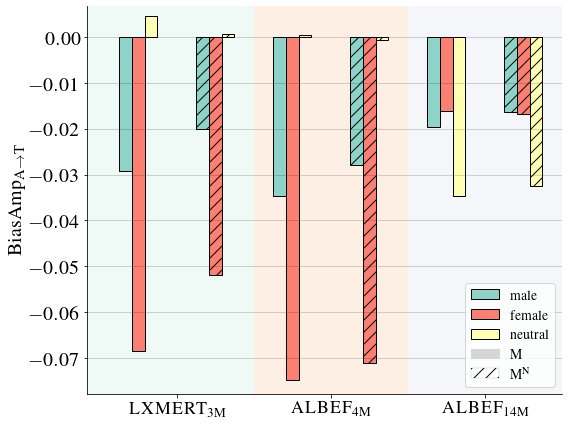

In [14]:
name="vqa_dba"

data_ = [
         lxmert, lxmert_n,
         albef_14m, albef_14m_coco,
         blip, blip_coco]
index_ = ["lxmert", "lxmert_n",
          "albef14m", "albef14m_n", 
          "blip", "blip_n"]
df = pd.DataFrame(data=data_, 
                  index=index_,
                  columns=["M","F","N"])
df["model"] = df.index

f, ax0 = plt.subplots(figsize=(8,6), tight_layout=True)

bar_width = 2./len(models)

cm = plt.get_cmap('Set3') 
colors = cm.colors
bcm = plt.get_cmap('Pastel2')
bcolors = bcm.colors
ax0.set_xlim(-0.5, 5.5+bar_width) 
ax0.axvspan(-0.5, 1.5+bar_width, facecolor=bcolors[0], alpha=0.2)
ax0.axvspan(1.5+bar_width, 3.5+bar_width, facecolor=bcolors[1], alpha=0.3)
ax0.axvspan(3.5+bar_width, 5.5+bar_width, facecolor=bcolors[2], alpha=0.2)

ax0.set_xticks([0.5+bar_width, 2.5+bar_width, 4.5+bar_width])
ax0.set_xticklabels(['$\\mathrm{\\textsc{LXMERT}_{3M}}$', 
                     '$\\mathrm{\\textsc{ALBEF}_{4M}}$', 
                     '$\\mathrm{\\textsc{ALBEF}_{14M}}$'], fontsize=18)

plot_dict = {
    'M': colors[0],
    'F': colors[3],
    'N': colors[1]}
row_names = list(plot_dict.keys())

X = np.array(range(len(df)))
xs = [x[i] for i in range(3) for x in df.values]

for i, name in list(enumerate([y for x in row_names for y in x])):
    ys = [x for x in df[name].values]    
    label=None
    ax0.bar(X + i*bar_width, ys, 
            width=bar_width, label=label, color=plot_dict[name], 
            hatch=[None, "//"]*int(len(df)/2), 
            edgecolor='black') 
        

ax0.set_ylabel('$\\mathrm{BiasAmp_{ A\\rightarrow{T}}}$', fontsize=20)
ax0.set_ylim(min(xs)-0.003, max(xs)+0.002)

ax0.tick_params(axis="y", labelsize=20)
ax0.grid(color='black', alpha=0.2, axis='y')

ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)

h = [Patch(facecolor=colors[0], edgecolor='k', label='male'),
     Patch(facecolor=colors[3], edgecolor='k', label='female'),
     Patch(facecolor=colors[1], edgecolor='k', label='neutral'),
     Patch(facecolor='#d6d6d6', edgecolor='#d6d6d6', label='$\\mathrm{M}$'),
     Patch(facecolor='white', edgecolor='black', hatch='//',linewidth=0.1, label='$\\mathrm{M^{N}}$'),
    ]
ax0.legend(handles=h, ncol=1, scatterpoints=1, fontsize=14, loc='lower right')

plt.savefig(f'figures/vqa_dba_hist_cc3m.pdf', bbox_inches='tight')

# GQA

In [33]:
# GQA
lxmert=[-0.28080173,-0.32281553,-0.31938049] #M,F,N
lxmert_n=[-0.28433877,-0.31241331,-0.32314776]
lxmert_3m=[-0.27962272,-0.31622746,-0.31226455]
lxmert_3m_n=[-0.28532128,-0.32454924,-0.33696107]
albef_4m=[-0.00432305,-0.08668516,-0.00502302]
albef_4m_coco=[0.03733543,-0.02843273,-0.04646296]
albef_4m_cc3m=[-0.00373354,-0.12101248,-0.00753453]
albef_14m=[0.05619965,0.02565881,-0.05567183]
albef_14m_coco=[0.05109059, -0.02739251, -0.06069485]
albef_14m_cc3m=[-0.0605227,-0.10055479,0.01339473]
blip=[-0.06661427,-0.07905687,0.01172039]
blip_coco=[0.0349774,-0.01352288,-0.02678945]

# Visualize data
data_ = [lxmert, lxmert_n,
         lxmert_3m, lxmert_3m_n,
         albef_4m, albef_4m_coco, albef_4m_cc3m,
         albef_14m, albef_14m_coco, albef_14m_cc3m,
         blip, blip_coco]
index_ = ["lxmert", "lxmert_n",
          "lxmert_3m", "lxmert_3m_n",
          "albef4m", "albef4m_n", "concapalbef4m_n", 
          "albef14m", "albef14m_n", "concapalbef14m_n", 
          "blip", "blip_n"]
df = pd.DataFrame(data=data_, 
                  index=index_,
                 columns=["M","F","N"])
df["model"] = df.index
df

,M,F,N,model
lxmert,-0.280802,-0.322816,-0.319380,lxmert
lxmert_n,-0.284339,-0.312413,-0.323148,lxmert_n
concaplxmert,-0.279623,-0.316227,-0.312265,concaplxmert
concaplxmert_n,-0.285321,-0.324549,-0.336961,concaplxmert_n
albef4m,-0.004323,-0.086685,-0.005023,albef4m
albef4m_n,0.037335,-0.028433,-0.046463,albef4m_n
concapalbef4m_n,-0.003734,-0.121012,-0.007535,concapalbef4m_n
albef14m,0.056200,0.025659,-0.055672,albef14m
albef14m_n,0.051091,-0.027393,-0.060695,albef14m_n
concapalbef14m_n,-0.060523,-0.100555,0.013395,concapalbef14m_n


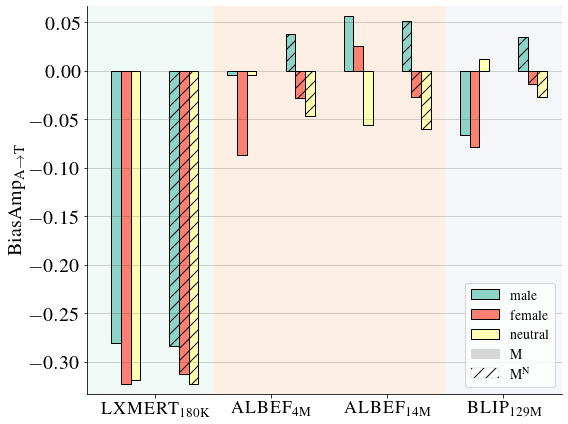

In [36]:
name="gqa_dba"

data_ = [
         lxmert, lxmert_n,
         albef_4m, albef_4m_coco,
         albef_14m, albef_14m_coco,
         blip, blip_coco]
index_ = ["lxmert", "lxmert_n",
          "albef4m", "albef4m_n", 
          "albef14m", "albef14m_n", 
          "blip", "blip_n"]
df = pd.DataFrame(data=data_, 
                  index=index_,
                 columns=["M","F","N"])
df["model"] = df.index

f, ax0 = plt.subplots(figsize=(8,6), tight_layout=True)

bar_width = 2./len(models)

cm = plt.get_cmap('Set3') 
colors = cm.colors
bcm = plt.get_cmap('Pastel2')
bcolors = bcm.colors
ax0.set_xlim(-0.5, 7.5+bar_width) 
ax0.axvspan(-0.5, 1.5+bar_width, facecolor=bcolors[0], alpha=0.2)
ax0.axvspan(1.5+bar_width, 5.5+bar_width, facecolor=bcolors[1], alpha=0.3)
ax0.axvspan(5.5+bar_width, 7.5+bar_width, facecolor=bcolors[2], alpha=0.2)

ax0.set_xticks([0.5+bar_width, 2.5+bar_width, 4.5+bar_width, 6.5+bar_width])
ax0.set_xticklabels(['$\\mathrm{\\textsc{LXMERT}_{180K}}$', 
                     '$\\mathrm{\\textsc{ALBEF}_{4M}}$', 
                     '$\\mathrm{\\textsc{ALBEF}_{14M}}$', 
                     '$\\mathrm{\\textsc{BLIP}_{129M}}$'], fontsize=18)

plot_dict = {
    'M': colors[0],
    'F': colors[3],
    'N': colors[1]}
row_names = list(plot_dict.keys())

X = np.array(range(len(df)))
xs = [x[i] for i in range(3) for x in df.values]

for i, name in list(enumerate([y for x in row_names for y in x])):
    ys = [x for x in df[name].values]    
    label=None
    ax0.bar(X + i*bar_width, ys, 
            width=bar_width, label=label, color=plot_dict[name], 
            hatch=[None, "//"]*int(len(df)/2), 
            edgecolor='black') 
        

ax0.set_ylabel('$\\mathrm{BiasAmp_{ A\\rightarrow{T}}}$', fontsize=20)
ax0.set_ylim(min(xs)-0.01, max(xs)+0.01)

ax0.tick_params(axis="y", labelsize=20)
ax0.grid(color='black', alpha=0.2, axis='y')

ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)

h = [Patch(facecolor=colors[0], edgecolor='k', label='male'),
     Patch(facecolor=colors[3], edgecolor='k', label='female'),
     Patch(facecolor=colors[1], edgecolor='k', label='neutral'),
     Patch(facecolor='#d6d6d6', edgecolor='#d6d6d6', label='$\\mathrm{M}$'),
     Patch(facecolor='white', edgecolor='black', hatch='//',linewidth=0.1, label='$\\mathrm{M^{N}}$'),
    ]
ax0.legend(handles=h, ncol=1, scatterpoints=1, fontsize=14, loc='lower right')

plt.savefig(f'figures/gqa_dba_hist_coco_all.pdf', bbox_inches='tight')

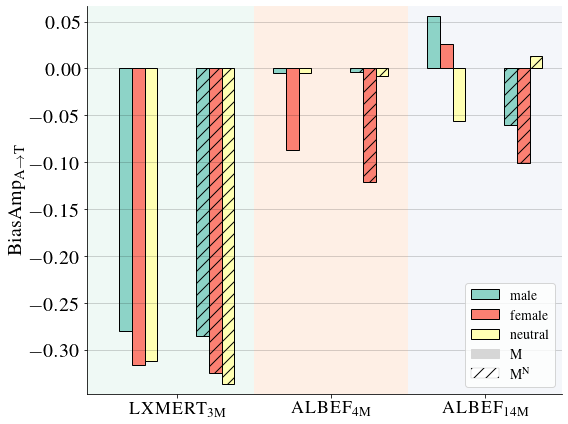

In [7]:
name="gqa_dba"

data_ = [lxmert_3m, lxmert_3m_n,
         albef_4m, albef_4m_cc3m,
         albef_14m, albef_14m_cc3m]
index_ = ["lxmert", "lxmert_n",
          "albef4m", "albef4m_n", 
          "albef14m", "albef14m_n"]
df = pd.DataFrame(data=data_, 
                  index=index_,
                 columns=["M","F","N"])
df["model"] = df.index

f, ax0 = plt.subplots(figsize=(8,6), tight_layout=True)

bar_width = 2./len(models)

cm = plt.get_cmap('Set3') 
colors = cm.colors
bcm = plt.get_cmap('Pastel2')
bcolors = bcm.colors
ax0.set_xlim(-0.5, 5.5+bar_width) 
ax0.axvspan(-0.5, 1.5+bar_width, facecolor=bcolors[0], alpha=0.2)
ax0.axvspan(1.5+bar_width, 3.5+bar_width, facecolor=bcolors[1], alpha=0.3)
ax0.axvspan(3.5+bar_width, 5.5+bar_width, facecolor=bcolors[2], alpha=0.2)

ax0.set_xticks([0.5+bar_width, 2.5+bar_width, 4.5+bar_width])
ax0.set_xticklabels(['$\\mathrm{\\textsc{LXMERT}_{3M}}$', 
                     '$\\mathrm{\\textsc{ALBEF}_{4M}}$', 
                     '$\\mathrm{\\textsc{ALBEF}_{14M}}$'], fontsize=18)

plot_dict = {
    'M': colors[0],
    'F': colors[3],
    'N': colors[1]}
row_names = list(plot_dict.keys())

X = np.array(range(len(df)))
xs = [x[i] for i in range(3) for x in df.values]

for i, name in list(enumerate([y for x in row_names for y in x])):
    ys = [x for x in df[name].values]    
    label=None
    ax0.bar(X + i*bar_width, ys, 
            width=bar_width, label=label, color=plot_dict[name], 
            hatch=[None, "//"]*int(len(df)/2), 
            edgecolor='black') 
        

ax0.set_ylabel('$\\mathrm{BiasAmp_{ A\\rightarrow{T}}}$', fontsize=20)
ax0.set_ylim(min(xs)-0.01, max(xs)+0.01)

ax0.tick_params(axis="y", labelsize=20)
ax0.grid(color='black', alpha=0.2, axis='y')

ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)

h = [Patch(facecolor=colors[0], edgecolor='k', label='male'),
     Patch(facecolor=colors[3], edgecolor='k', label='female'),
     Patch(facecolor=colors[1], edgecolor='k', label='neutral'),
     Patch(facecolor='#d6d6d6', edgecolor='#d6d6d6', label='$\\mathrm{M}$'),
     Patch(facecolor='white', edgecolor='black', hatch='//',linewidth=0.1, label='$\\mathrm{M^{N}}$'),
    ]
ax0.legend(handles=h, ncol=1, scatterpoints=1, fontsize=14, loc='lower right')

plt.savefig(f'figures/gqa_dba_hist_cc3m.pdf', bbox_inches='tight')

# F30K

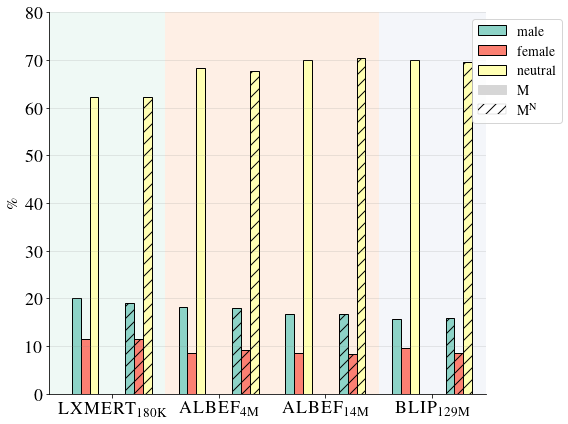

In [6]:
#IR
lxmert_original=[20.0652528548124, 11.419249592169658, 62.31647634584013]
lxmert_original_ckpt=[19.086460032626427, 11.582381729200652, 62.31647634584013]
lxmert_cc_ctrl=[18.92332789559543, 14.681892332789559, 57.91190864600326]
lxmert_cc_ctrl_ckpt=[19.249592169657422, 13.050570962479608, 60.52202283849919]
albef_4m=[18.270799347471453, 8.64600326264274, 68.35236541598695]
albef_4m_coco_neutral=[17.94453507340946, 9.135399673735726, 67.69983686786297]
albef_4m_cc3m_neutral=[17.94453507340946, 8.64600326264274, 69.16802610114192]
albef_14m=[16.802610114192497, 8.482871125611746, 69.9836867862969]
albef_14m_coco_neutral=[16.6394779771615, 8.31973898858075, 70.47308319738988]
albef_14m_cc3m_neutral=[16.802610114192497, 9.624796084828711, 68.67862969004894]
blip=[15.660685154975528, 9.624796084828711, 69.9836867862969]
blip_coco_neutral=[15.98694942903752, 8.64600326264274, 69.65742251223492]

data_ir = [lxmert_original, lxmert_original_ckpt,
         albef_4m, albef_4m_coco_neutral,
         albef_14m, albef_14m_coco_neutral,
         blip, blip_coco_neutral]
index_ = ["lxmert_3m", "lxmert_3m_n",
          "albef4m", "concapalbef4m_n", 
          "albef14m", "concapalbef14m_n", 
          "blip", "blip_n"]

dfir = pd.DataFrame(data=data_ir, 
                  index=index_,
                 columns=["M","F","N"])
dfir["model"] = dfir.index

f, ax0 = plt.subplots(figsize=(8,6), tight_layout=True)

bar_width = 2./len(models)

cm = plt.get_cmap('Set3') 
colors = cm.colors
bcm = plt.get_cmap('Pastel2')
bcolors = bcm.colors
ax0.set_xlim(-0.5, 7.5+bar_width) 
ax0.axvspan(-0.5, 1.5+bar_width, facecolor=bcolors[0], alpha=0.2)
ax0.axvspan(1.5+bar_width, 5.5+bar_width, facecolor=bcolors[1], alpha=0.3)
ax0.axvspan(5.5+bar_width, 7.5+bar_width, facecolor=bcolors[2], alpha=0.2)

ax0.set_xticks([0.5+bar_width, 2.5+bar_width, 4.5+bar_width, 6.5+bar_width])
ax0.set_xticklabels(['$\\mathrm{\\textsc{LXMERT}_{180K}}$', 
                     '$\\mathrm{\\textsc{ALBEF}_{4M}}$', 
                     '$\\mathrm{\\textsc{ALBEF}_{14M}}$', 
                     '$\\mathrm{\\textsc{BLIP}_{129M}}$'], fontsize=18)

plot_dict = {
    'M': colors[0],
    'F': colors[3],
    'N': colors[1]}
row_names = list(plot_dict.keys())

X = np.array(range(len(dfir)))

for i, name in list(enumerate([y for x in row_names for y in x])):
    ys = [x for x in dfir[name].values]    
    label=None
    ax0.bar(X + i*bar_width, ys, 
            width=bar_width, label=label, color=plot_dict[name], 
            hatch=[None, "//"]*int(len(dfir)/2), 
            edgecolor='black')  

ax0.set_ylabel('\%', fontsize=15)
ax0.set_ylim(0, 80)

ax0.tick_params(axis="y", labelsize=18)
ax0.grid(color='gray', alpha=0.2, axis='y')

ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)

h = [Patch(facecolor=colors[0], edgecolor='k', label='male'),
     Patch(facecolor=colors[3], edgecolor='k', label='female'),
     Patch(facecolor=colors[1], edgecolor='k', label='neutral'),
     Patch(facecolor='#d6d6d6', edgecolor='#d6d6d6', label='$\\mathrm{M}$'),
     Patch(facecolor='white', edgecolor='black', hatch='//',linewidth=0.1, label='$\\mathrm{M^{N}}$')
    ]
ax0.legend(handles=h, ncol=1, scatterpoints=1, fontsize=14, loc='upper right', bbox_to_anchor=(1.19,1.0))
plt.savefig(f'figures/f30kIR_not_dba_hist_coco.pdf', bbox_inches='tight')

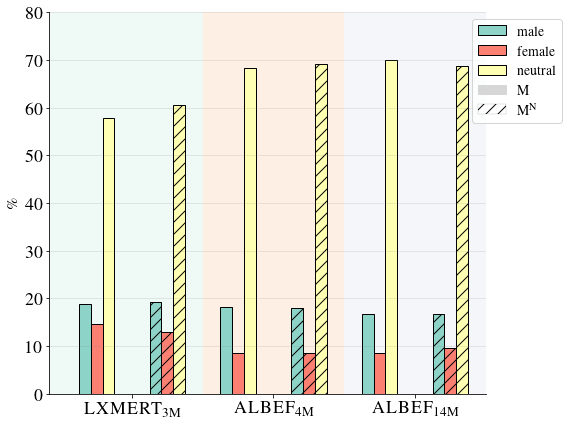

In [7]:
#IR
lxmert_original=[20.0652528548124, 11.419249592169658, 62.31647634584013]
lxmert_original_ckpt=[19.086460032626427, 11.582381729200652, 62.31647634584013]
lxmert_cc_ctrl=[18.92332789559543, 14.681892332789559, 57.91190864600326]
lxmert_cc_ctrl_ckpt=[19.249592169657422, 13.050570962479608, 60.52202283849919]
albef_4m=[18.270799347471453, 8.64600326264274, 68.35236541598695]
albef_4m_coco_neutral=[17.94453507340946, 9.135399673735726, 67.69983686786297]
albef_4m_cc3m_neutral=[17.94453507340946, 8.64600326264274, 69.16802610114192]
albef_14m=[16.802610114192497, 8.482871125611746, 69.9836867862969]
albef_14m_coco_neutral=[16.6394779771615, 8.31973898858075, 70.47308319738988]
albef_14m_cc3m_neutral=[16.802610114192497, 9.624796084828711, 68.67862969004894]
blip=[15.660685154975528, 9.624796084828711, 69.9836867862969]
blip_coco_neutral=[15.98694942903752, 8.64600326264274, 69.65742251223492]

data_ir = [
         lxmert_cc_ctrl, lxmert_cc_ctrl_ckpt,
         albef_4m, albef_4m_cc3m_neutral,
         albef_14m, albef_14m_cc3m_neutral]
index_ = [
          "lxmert_3m", "lxmert_3m_n",
          "albef4m", "concapalbef4m_n", 
          "albef14m", "concapalbef14m_n"]

dfir = pd.DataFrame(data=data_ir, 
                  index=index_,
                 columns=["M","F","N"])
dfir["model"] = dfir.index


f, ax0 = plt.subplots(figsize=(8,6), tight_layout=True)

bar_width = 2./len(models)

cm = plt.get_cmap('Set3') 
colors = cm.colors
bcm = plt.get_cmap('Pastel2')
bcolors = bcm.colors
ax0.set_xlim(-0.5, 5.5+bar_width) 
ax0.axvspan(-0.5, 1.5+bar_width, facecolor=bcolors[0], alpha=0.2)
ax0.axvspan(1.5+bar_width, 3.5+bar_width, facecolor=bcolors[1], alpha=0.3)
ax0.axvspan(3.5+bar_width, 5.5+bar_width, facecolor=bcolors[2], alpha=0.2)

ax0.set_xticks([0.5+bar_width, 2.5+bar_width, 4.5+bar_width])
ax0.set_xticklabels(['$\\mathrm{\\textsc{LXMERT}_{3M}}$', 
                     '$\\mathrm{\\textsc{ALBEF}_{4M}}$', 
                     '$\\mathrm{\\textsc{ALBEF}_{14M}}$'], fontsize=18)

plot_dict = {
    'M': colors[0],
    'F': colors[3],
    'N': colors[1]}
row_names = list(plot_dict.keys())

X = np.array(range(len(dfir)))

for i, name in list(enumerate([y for x in row_names for y in x])):
    #ir
    ys = [x for x in dfir[name].values]    
    label=None
    ax0.bar(X + i*bar_width, ys, 
            width=bar_width, label=label, color=plot_dict[name], 
            hatch=[None, "//"]*int(len(dfir)/2), 
            edgecolor='black')    

ax0.set_ylabel('\%', fontsize=15)
ax0.set_ylim(0, 80)

ax0.tick_params(axis="y", labelsize=18)
ax0.grid(color='gray', alpha=0.2, axis='y')

ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)

h = [Patch(facecolor=colors[0], edgecolor='k', label='male'),
     Patch(facecolor=colors[3], edgecolor='k', label='female'),
     Patch(facecolor=colors[1], edgecolor='k', label='neutral'),
     Patch(facecolor='#d6d6d6', edgecolor='#d6d6d6', label='$\\mathrm{M}$'),
     Patch(facecolor='white', edgecolor='black', hatch='//',linewidth=0.1, label='$\\mathrm{M^{N}}$')
    ]
ax0.legend(handles=h, ncol=1, scatterpoints=1, fontsize=14, loc='upper right', bbox_to_anchor=(1.19,1.0))
plt.savefig(f'figures/f30kIR_not_dba_hist_cc3m.pdf', bbox_inches='tight')


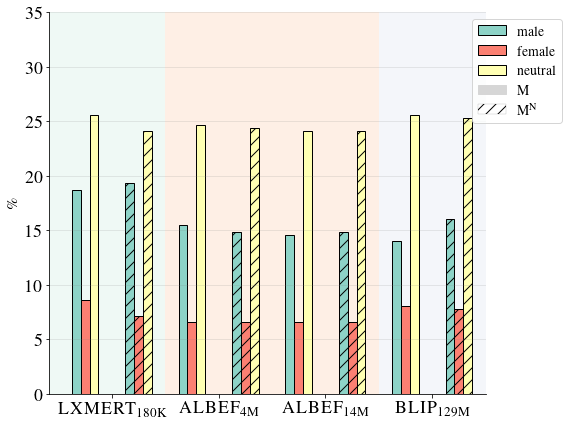

In [8]:
#TR
lxmert_original=[18.75, 8.630952380952381, 25.595238095238095]
lxmert_original_ckpt=[19.345238095238095, 7.142857142857142, 24.107142857142858]
lxmert_cc_ctrl=[24.702380952380953, 8.630952380952381, 21.726190476190478]
lxmert_cc_ctrl_ckpt=[20.833333333333336, 9.226190476190476, 22.916666666666664]
albef_4m=[15.476190476190476, 6.547619047619048, 24.702380952380953]
albef_4m_coco_neutral=[14.880952380952381, 6.547619047619048, 24.404761904761905]
albef_4m_cc3m_neutral=[14.880952380952381, 6.845238095238096, 23.809523809523807]
albef_14m=[14.583333333333334, 6.547619047619048, 24.107142857142858]
albef_14m_coco_neutral=[14.880952380952381, 6.547619047619048, 24.107142857142858]
albef_14m_cc3m_neutral=[14.583333333333334, 7.142857142857142, 24.404761904761905]
blip=[13.988095238095239, 8.035714285714286, 25.595238095238095]
blip_coco_neutral=[16.071428571428573, 7.738095238095238, 25.297619047619047]
data_tr = [lxmert_original, lxmert_original_ckpt,
         albef_4m, albef_4m_coco_neutral,
         albef_14m, albef_14m_coco_neutral,
         blip, blip_coco_neutral]
index_ = ["lxmert_3m", "lxmert_3m_n",
          "albef4m", "concapalbef4m_n", 
          "albef14m", "concapalbef14m_n", 
          "blip", "blip_n"]
dftr = pd.DataFrame(data=data_tr, 
                  index=index_,
                 columns=["M","F","N"])
dftr["model"] = dftr.index

f, ax0 = plt.subplots(figsize=(8,6), tight_layout=True)

bar_width = 2./len(models)

cm = plt.get_cmap('Set3') 
colors = cm.colors
bcm = plt.get_cmap('Pastel2')
bcolors = bcm.colors
ax0.set_xlim(-0.5, 7.5+bar_width) 
ax0.axvspan(-0.5, 1.5+bar_width, facecolor=bcolors[0], alpha=0.2)
ax0.axvspan(1.5+bar_width, 5.5+bar_width, facecolor=bcolors[1], alpha=0.3)
ax0.axvspan(5.5+bar_width, 7.5+bar_width, facecolor=bcolors[2], alpha=0.2)

ax0.set_xticks([0.5+bar_width, 2.5+bar_width, 4.5+bar_width, 6.5+bar_width])
ax0.set_xticklabels(['$\\mathrm{\\textsc{LXMERT}_{180K}}$', 
                     '$\\mathrm{\\textsc{ALBEF}_{4M}}$', 
                     '$\\mathrm{\\textsc{ALBEF}_{14M}}$', 
                     '$\\mathrm{\\textsc{BLIP}_{129M}}$'], fontsize=18)

plot_dict = {
    'M': colors[0],
    'F': colors[3],
    'N': colors[1]}
row_names = list(plot_dict.keys())

X = np.array(range(len(dftr)))

for i, name in list(enumerate([y for x in row_names for y in x])):
    #tr
    ys = [x for x in dftr[name].values]    
    label=None
    ax0.bar(X + i*bar_width, ys, 
            width=bar_width, label=label, color=plot_dict[name], 
            hatch=[None, "//"]*int(len(dftr)/2), 
            edgecolor='black')    

ax0.set_ylabel('\%', fontsize=15)
ax0.set_ylim(0, 35)

ax0.tick_params(axis="y", labelsize=18)
ax0.grid(color='gray', alpha=0.2, axis='y')

ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)

h = [Patch(facecolor=colors[0], edgecolor='k', label='male'),
     Patch(facecolor=colors[3], edgecolor='k', label='female'),
     Patch(facecolor=colors[1], edgecolor='k', label='neutral'),
     Patch(facecolor='#d6d6d6', edgecolor='#d6d6d6', label='$\\mathrm{M}$'),
     Patch(facecolor='white', edgecolor='black', hatch='//',linewidth=0.1, label='$\\mathrm{M^{N}}$')
    ]
ax0.legend(handles=h, ncol=1, scatterpoints=1, fontsize=14, loc='upper right', bbox_to_anchor=(1.19,1.0))
plt.savefig(f'figures/f30kTR_not_dba_hist_coco.pdf', bbox_inches='tight')


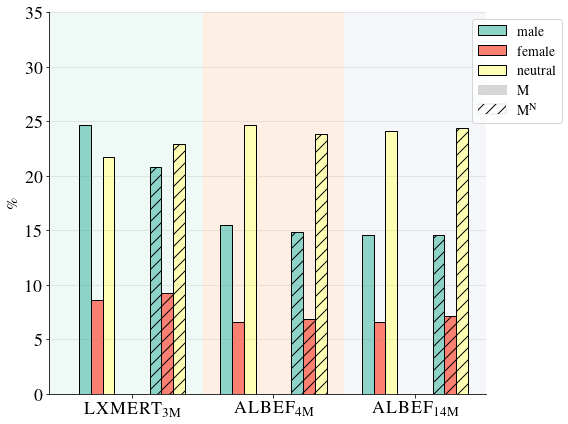

In [9]:
#TR
lxmert_original=[18.75, 8.630952380952381, 25.595238095238095]
lxmert_original_ckpt=[19.345238095238095, 7.142857142857142, 24.107142857142858]
lxmert_cc_ctrl=[24.702380952380953, 8.630952380952381, 21.726190476190478]
lxmert_cc_ctrl_ckpt=[20.833333333333336, 9.226190476190476, 22.916666666666664]
albef_4m=[15.476190476190476, 6.547619047619048, 24.702380952380953]
albef_4m_coco_neutral=[14.880952380952381, 6.547619047619048, 24.404761904761905]
albef_4m_cc3m_neutral=[14.880952380952381, 6.845238095238096, 23.809523809523807]
albef_14m=[14.583333333333334, 6.547619047619048, 24.107142857142858]
albef_14m_coco_neutral=[14.880952380952381, 6.547619047619048, 24.107142857142858]
albef_14m_cc3m_neutral=[14.583333333333334, 7.142857142857142, 24.404761904761905]
blip=[13.988095238095239, 8.035714285714286, 25.595238095238095]
blip_coco_neutral=[16.071428571428573, 7.738095238095238, 25.297619047619047]
data_tr = [lxmert_cc_ctrl, lxmert_cc_ctrl_ckpt,
         albef_4m, albef_4m_cc3m_neutral,
         albef_14m, albef_14m_cc3m_neutral]
index_ = ["lxmert_3m", "lxmert_3m_n",
          "albef4m", "concapalbef4m_n", 
          "albef14m", "concapalbef14m_n"]
dftr = pd.DataFrame(data=data_tr, 
                  index=index_,
                 columns=["M","F","N"])
dftr["model"] = dftr.index

f, ax0 = plt.subplots(figsize=(8,6), tight_layout=True)

bar_width = 2./len(models)

cm = plt.get_cmap('Set3') 
colors = cm.colors
bcm = plt.get_cmap('Pastel2')
bcolors = bcm.colors
ax0.set_xlim(-0.5, 5.5+bar_width) 
ax0.axvspan(-0.5, 1.5+bar_width, facecolor=bcolors[0], alpha=0.2)
ax0.axvspan(1.5+bar_width, 3.5+bar_width, facecolor=bcolors[1], alpha=0.3)
ax0.axvspan(3.5+bar_width, 5.5+bar_width, facecolor=bcolors[2], alpha=0.2)

ax0.set_xticks([0.5+bar_width, 2.5+bar_width, 4.5+bar_width])
ax0.set_xticklabels(['$\\mathrm{\\textsc{LXMERT}_{3M}}$', 
                     '$\\mathrm{\\textsc{ALBEF}_{4M}}$', 
                     '$\\mathrm{\\textsc{ALBEF}_{14M}}$'], fontsize=18)

plot_dict = {
    'M': colors[0],
    'F': colors[3],
    'N': colors[1]}
row_names = list(plot_dict.keys())

X = np.array(range(len(dftr)))

for i, name in list(enumerate([y for x in row_names for y in x])):
    #tr
    ys = [x for x in dftr[name].values]    
    label=None
    ax0.bar(X + i*bar_width, ys, 
            width=bar_width, label=label, color=plot_dict[name], 
            hatch=[None, "//"]*int(len(dftr)/2), 
            edgecolor='black')    

ax0.set_ylabel('\%', fontsize=15)
ax0.set_ylim(0, 35)

ax0.tick_params(axis="y", labelsize=18)
ax0.grid(color='gray', alpha=0.2, axis='y')

ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)

h = [Patch(facecolor=colors[0], edgecolor='k', label='male'),
     Patch(facecolor=colors[3], edgecolor='k', label='female'),
     Patch(facecolor=colors[1], edgecolor='k', label='neutral'),
     Patch(facecolor='#d6d6d6', edgecolor='#d6d6d6', label='$\\mathrm{M}$'),
     Patch(facecolor='white', edgecolor='black', hatch='//',linewidth=0.1, label='$\\mathrm{M^{N}}$')
    ]
ax0.legend(handles=h, ncol=1, scatterpoints=1, fontsize=14, loc='upper right', bbox_to_anchor=(1.19,1.0))
plt.savefig(f'figures/f30kTR_not_dba_hist_cc3m.pdf', bbox_inches='tight')
